In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv'

In [3]:
data=gpd.read_file(url)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   edition        106 non-null    object
 1   start_date     106 non-null    object
 2   winner_name    106 non-null    object
 3   winner_team    106 non-null    object
 4   distance       106 non-null    object
 5   time_overall   106 non-null    object
 6   time_margin    106 non-null    object
 7   stage_wins     106 non-null    object
 8   stages_led     106 non-null    object
 9   height         106 non-null    object
 10  weight         106 non-null    object
 11  age            106 non-null    object
 12  born           106 non-null    object
 13  died           106 non-null    object
 14  full_name      106 non-null    object
 15  nickname       106 non-null    object
 16  birth_town     106 non-null    object
 17  birth_country  106 non-null    object
 18  nationality    106 non-null   

In [5]:
data.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La FranÃ§aise,2428,94.55388888888889,2.9891666666666667,3,6,1.62,60,32,1871-03-03,1957-02-19,NA,The Little Chimney-sweep,Arvier,Italy,Â France
1,2,1904-07-02,Henri Cornet,Conte,2428,96.09861111111111,2.2705555555555557,1,3,NA,NA,19,1884-08-04,1941-03-18,NA,Le rigolo (The joker),Desvres,France,Â France
2,3,1905-07-09,Louis Trousselier,Peugeotâ€“Wolber,2994,NA,NA,5,10,NA,NA,24,1881-06-29,1939-04-24,NA,Levaloy / Trou-trou,Paris,France,Â France
3,4,1906-07-04,RenÃ© Pottier,Peugeotâ€“Wolber,4637,NA,NA,5,12,NA,NA,27,1879-06-05,1907-01-25,NA,NA,Moret-sur-Loing,France,Â France
4,5,1907-07-08,Lucien Petit-Breton,Peugeotâ€“Wolber,4488,NA,NA,2,5,NA,NA,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,PlessÃ©,France,Â France


In [6]:
pd.to_datetime(data['start_date'])

0     1903-07-01
1     1904-07-02
2     1905-07-09
3     1906-07-04
4     1907-07-08
         ...    
101   2015-07-04
102   2016-07-02
103   2017-07-01
104   2018-07-07
105   2019-07-06
Name: start_date, Length: 106, dtype: datetime64[ns]

In [7]:
data['Date']=pd.to_datetime(data['start_date'])

In [8]:
data['Date'].dtype

dtype('<M8[ns]')

In [9]:
data['time_margin'] = pd.to_numeric(data['time_margin'], errors='coerce')
data['time_margin'] = pd.to_timedelta(data['time_margin'], unit='s')


In [10]:
# 1) Winning time and runner-up gap for every edition (time_overall & time_margin)
if 'time_overall' in data.columns:
    winners = data.sort_values('start_date')
    series = winners[['edition','start_date','winner_name','time_overall','time_margin']].copy()
    display(series.head(12))
else:
    raise ValueError("Dataset missing 'time_overall' column. Adjust notebook to match your CSV.")

,edition,start_date,winner_name,time_overall,time_margin
0,1,1903-07-01,Maurice Garin,94.55388888888889,0 days 00:00:02.989166667
1,2,1904-07-02,Henri Cornet,96.09861111111111,0 days 00:00:02.270555556
2,3,1905-07-09,Louis Trousselier,NA,NaT
3,4,1906-07-04,RenÃ© Pottier,NA,NaT
4,5,1907-07-08,Lucien Petit-Breton,NA,NaT
5,6,1908-07-13,Lucien Petit-Breton,NA,NaT
6,7,1909-07-05,FranÃ§ois Faber,NA,NaT
7,8,1910-07-01,Octave Lapize,NA,NaT
8,9,1911-07-02,Gustave Garrigou,NA,NaT
9,10,1912-06-30,Odile Defraye,NA,NaT


<function matplotlib.pyplot.show(close=None, block=None)>

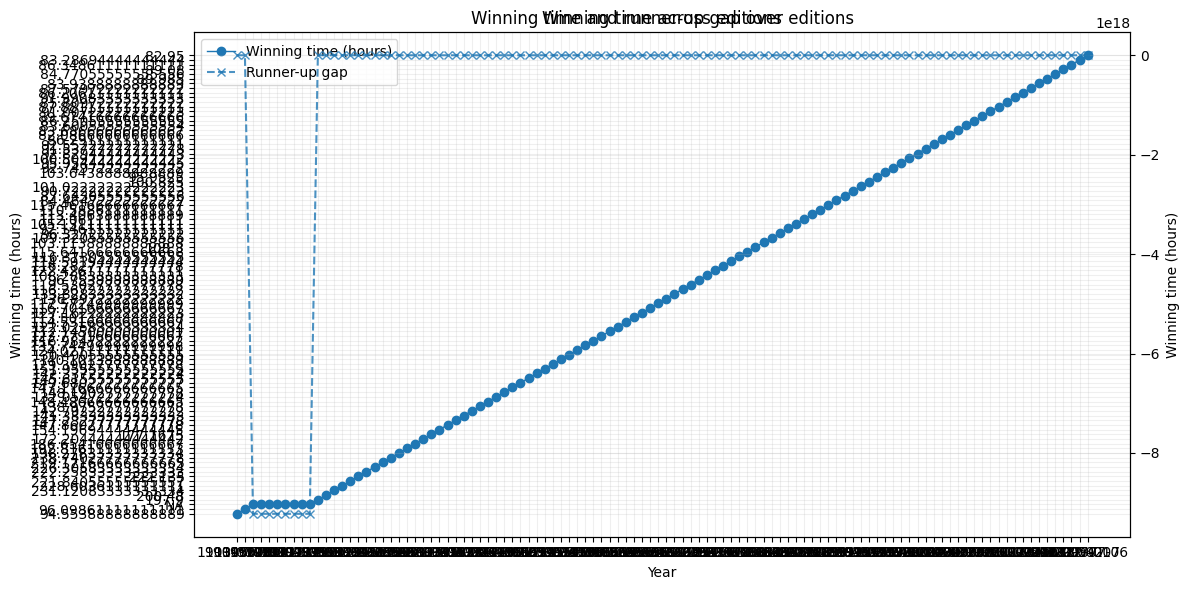

In [11]:
fig=plt.figure(figsize=(12,6))
plt.plot(winners['start_date'], winners['time_overall'], marker='o', linewidth=1, label='Winning time (hours)')
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(winners['start_date'], winners['time_margin'], marker='x', linestyle='--', label='Runner-up gap', alpha=0.8)
ax1.set_ylabel('Winning time (hours)')
ax1.set_xlabel('Year')
ax1.set_title('Winning time and runner-up gap over editions')
ax1.grid(alpha=0.2)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')
plt.title('Winning time across editions')
plt.ylabel('Winning time (hours)')
plt.xlabel('Year')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show


In [ ]:
# Box plot of winners per stage
stages = ('data_stagelevel', low_memory=False)
